<a href="https://colab.research.google.com/github/MaryMbugua109/MaryMbugua109/blob/main/Datasource1_MaryMbugua_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 Defining the Question

### Specifying the Data Analytic Question
> Implementing the KNN Classifier

### Metric of Success
> Build a model that has a good accuracy in predicting wether the passenger was male or female.

### Experimental Design
> 1.Importing our libraries

> 2.Data Preprocessing

> 3.Performing exploratory data analysis

> 4.LDA

> 5.KNN

##Importing our Libraries

In [1]:
# Importing our libraries
# 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Reading the Data

In [2]:
#Loading the datasets to our working directory
train=pd.read_csv('/content/test (1).csv')

#Previewing the top rows
train.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
#Loading the test dataset
test=pd.read_csv('/content/test (1).csv')
#Previewing the top rows in our test dataset
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
##Merging the train and test datasets
train_test=pd.merge(train,test)
train_test


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


##Data Preprocessing 1

In [5]:
#Determining the number of records in our dataset
print(f'The shape is {train_test.shape}')


The shape is (418, 11)


In [155]:
#Getting more informantion about our dataset
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    418 non-null    int64  
 1   name      418 non-null    object 
 2   sex       418 non-null    int64  
 3   age       418 non-null    float64
 4   sibsp     418 non-null    int64  
 5   parch     418 non-null    int64  
 6   ticket    418 non-null    int64  
 7   fare      418 non-null    float64
 8   embarked  418 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 52.7+ KB


###Duplicates

In [6]:
#Checking the total sum of duplicated records in our dataset
train_test.duplicated().sum()

0

###Missing Values

In [7]:
#Checking for missing values
train_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

###Imputing Missing Values

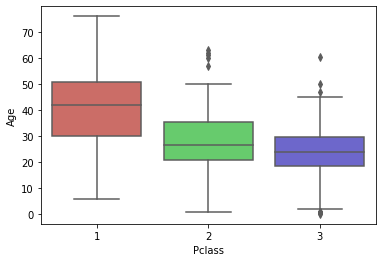

In [8]:
#Since i do not want to drop the missing values entirely,i'll use the 'p-class' to predict the age 
#of the passager
import seaborn as sb

sb.boxplot(x='Pclass',y='Age',data=train_test,palette='hls')

In [9]:
def age_approx(cols):
  Age=cols[0]
  Pclass=cols[1]
  if pd.isnull(Age):
    if Pclass==1:
      return 37
    elif Pclass==2:
      return 29
    else:
      return 24
  else:
      return Age
#Applying the functiona and confirming that we no longer have missing values
train_test['Age'] = train_test[['Age', 'Pclass']].apply(age_approx, axis=1)
train_test.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
#In the fare column, i will use mean imputation to fill the missing value
train_test['Fare']=train_test['Fare'].fillna(train_test['Fare'].mean())

In [11]:
##Dropping the cabin column and passenderid since they are not important
train_test=train_test.drop(['Cabin','PassengerId'],axis=1)

###Converting the column names to lowercase

In [12]:
train_test.columns=train_test.columns.str.lower()
#Confirming the changes
train_test.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'embarked'],
      dtype='object')

In [13]:
# Checking whether each column has an appropriate datatype
train_test.dtypes

pclass        int64
name         object
sex          object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
embarked     object
dtype: object

##External Datasource Validation
> I counterchecked the datasets column entries in Kaggle [https://www.kaggle.com/heptapod/titanic] and confirmed that they were accurate.

##Outliers

In [14]:
# Checking for Outlier
Q1 = train_test.quantile(0.25)
Q3 = train_test.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

pclass     2.0000
age       13.3750
sibsp      1.0000
parch      0.0000
fare      23.6042
dtype: float64


>we can see theyre outliers in all our columns.So i will plot boxplots to visualize the outliers

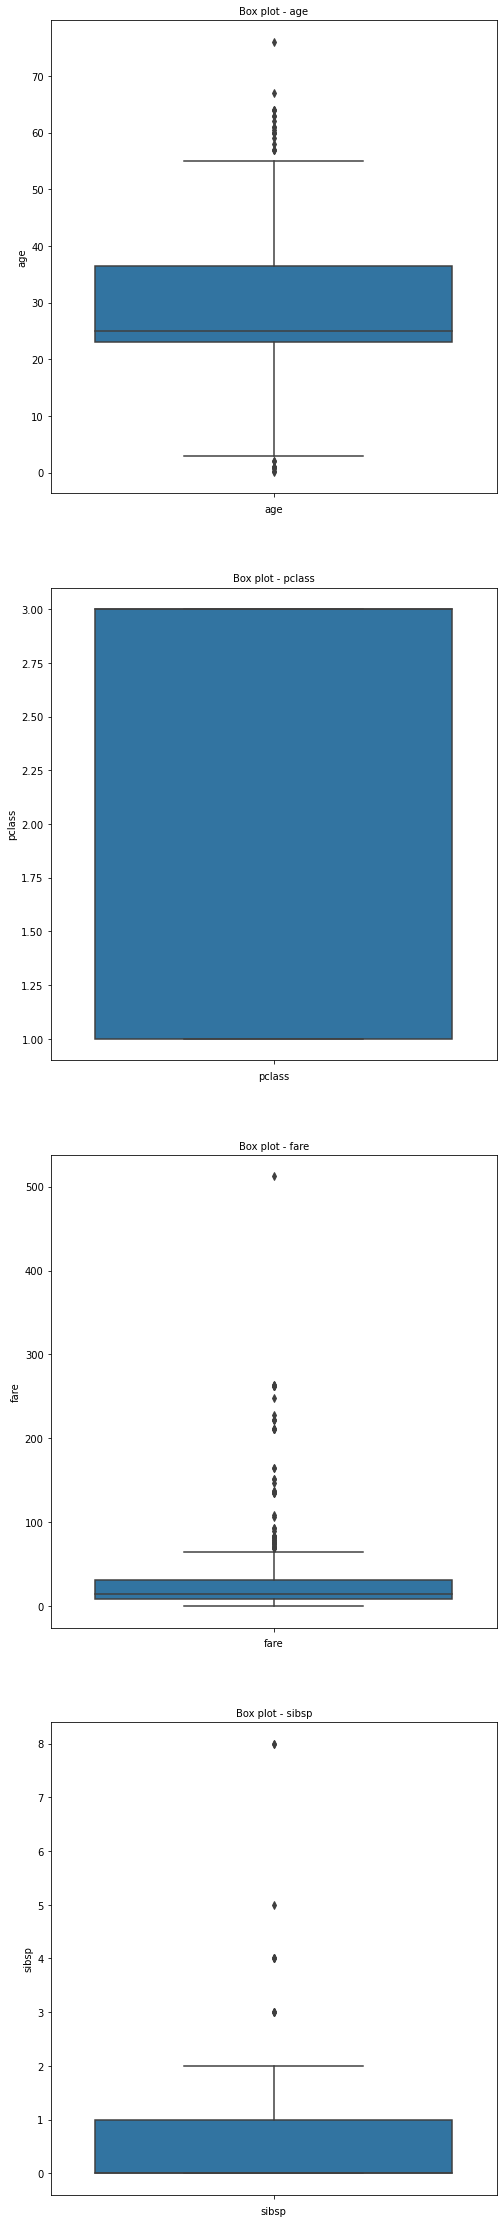

In [15]:
col_names = ['age','pclass','fare','sibsp']

fig,ax = plt.subplots(len(col_names),figsize=(8,40))
for i , col_val in enumerate(col_names):
  sns.boxplot(y=train_test[col_val],ax=ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize =10)
  ax[i].set_xlabel(col_val,fontsize=10)
plt.show()


In [16]:
train_test.describe()

,pclass,age,sibsp,parch,fare
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,29.321770,0.447368,0.392344,35.627188
std,0.841838,12.904065,0.896760,0.981429,55.840500
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800
50%,3.000000,25.000000,0.000000,0.000000,14.454200
75%,3.000000,36.375000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


#Exploratory Data Analaysis

##Univariate Analysis

###Frequency Tables

In [17]:
# Creating our frequency table for the sex representation
# ---
train_test.sex.value_counts()

male      266
female    152
Name: sex, dtype: int64

In [18]:
# Creating our frequency table for 
# ---
train_test.embarked.value_counts()

S    270
C    102
Q     46
Name: embarked, dtype: int64

###Bar Charts

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


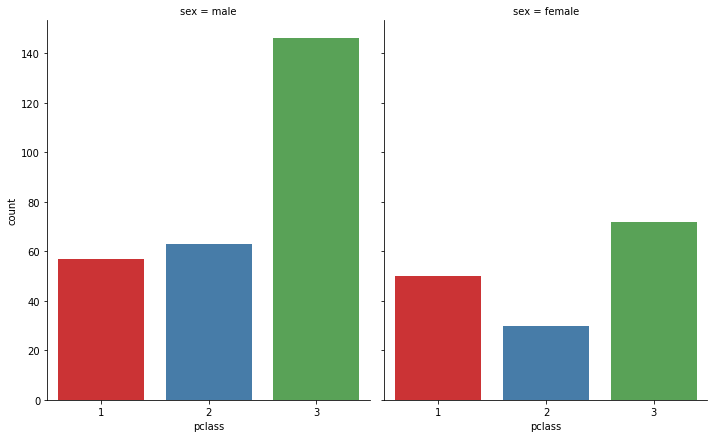

In [19]:
# Plotting bar charts
#
sns.catplot("pclass", col="sex", col_wrap=4, data=train_test, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()

>There were more males in Pclass-3,pclass_2 and also pclass_1 as compared to females.

###Histograms

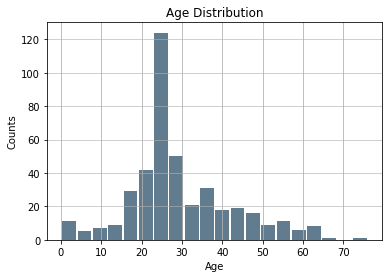

In [20]:
#visualizing age distribution 
size, scale = 1000, 10
age = train_test['age']

age.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

> The highest number of passengers in the Titanic were aged between 20-30 years

>Very few passengers were above 80years.

##Bivariate Analysis

###Correration

In [21]:
# Let's display the correlations between the variables
corr = train_test.corr()
corr

,pclass,age,sibsp,parch,fare
pclass,1.000000,-0.521341,0.001087,0.018721,-0.576619
age,-0.521341,1.000000,-0.076124,-0.052613,0.352453
sibsp,0.001087,-0.076124,1.000000,0.306895,0.171488
parch,0.018721,-0.052613,0.306895,1.000000,0.230001
fare,-0.576619,0.352453,0.171488,0.230001,1.000000


>There is a slight correlation between fare and age of the passenger.

>There is also a correlation between sibling/spouse number and parch.

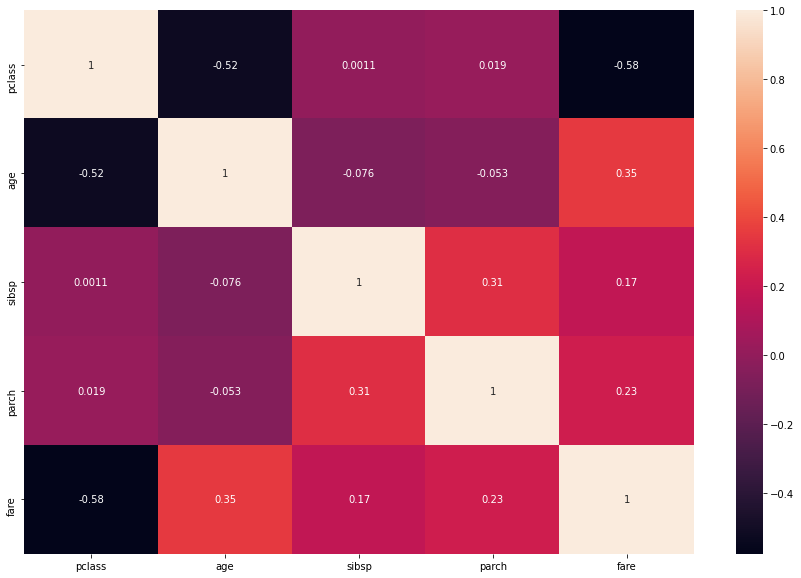

In [22]:
#visualizing correlation on a heatmap
plt.figure(figsize=(15,10))
sb.heatmap(corr, annot = True)
plt.show()

###Pairplots

<Figure size 480x320 with 0 Axes>

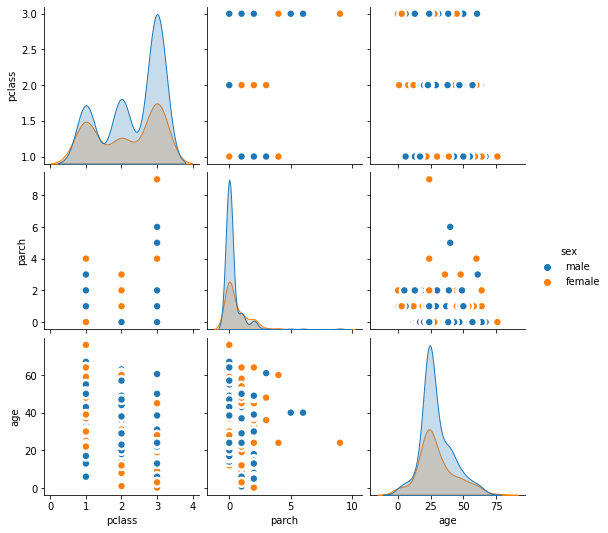

In [23]:
plt.figure(dpi= 80)
sns.pairplot(train_test[['pclass', 'parch', 'age', 'sex','ticket']], kind="scatter", hue="sex", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

##K-Nearest Neighbor

In [107]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

#Converting the sex and embarked variable into integer
label_encoder.fit(train_test['sex'])
train_test['sex']=label_encoder.transform(train_test['sex'])
label_encoder.fit(train_test['embarked'])
train_test['embarked']=label_encoder.transform(train_test['embarked'])
label_encoder.fit(train_test['ticket'])
train_test['ticket']=label_encoder.transform(train_test['ticket'])

In [90]:
train_test.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'embarked'],
      dtype='object')

In [108]:
#Splitting our dataset into attributes and labels
X=train_test.loc[:,('sex','age','sibsp','ticket','parch')]
y=train_test.loc[:,('pclass')]

In [109]:
#Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [110]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [111]:
#Training and making predictions
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [112]:
# 
y_pred = classifier.predict(X_test)

In [113]:
#Evaluating the performsnce of the algorithmn
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19  1  3]
 [ 6  9  9]
 [ 4  1 32]]
              precision    recall  f1-score   support

           1       0.66      0.83      0.73        23
           2       0.82      0.38      0.51        24
           3       0.73      0.86      0.79        37

    accuracy                           0.71        84
   macro avg       0.73      0.69      0.68        84
weighted avg       0.73      0.71      0.70        84



>Here we have an accuracy of 71% after using a 80-20 train_test ratio.

###Splitting 70-30 ratio

In [114]:
#Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [115]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [116]:
#Training and making predictions
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [117]:
# Making predictions on our test
y_pred = classifier.predict(X_test)

In [118]:
#Evaluating the performsnce of the algorithmn
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  4  1]
 [ 8  9 11]
 [ 2  8 63]]
              precision    recall  f1-score   support

           1       0.67      0.80      0.73        25
           2       0.43      0.32      0.37        28
           3       0.84      0.86      0.85        73

    accuracy                           0.73       126
   macro avg       0.65      0.66      0.65       126
weighted avg       0.71      0.73      0.72       126



>Our accuracy increases after dividing the train_test in 70-30 ratio to 73%

###Splitting on a 60-40 Ration

In [119]:
#Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [120]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [121]:
#Training and making predictions
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [122]:
# Making predictions on our test
y_pred = classifier.predict(X_test)

In [123]:
#Evaluating the performsnce of the algorithmn
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[48  2  3]
 [12 10 11]
 [ 7  7 68]]
              precision    recall  f1-score   support

           1       0.72      0.91      0.80        53
           2       0.53      0.30      0.38        33
           3       0.83      0.83      0.83        82

    accuracy                           0.75       168
   macro avg       0.69      0.68      0.67       168
weighted avg       0.73      0.75      0.73       168



>Our accuracy has further increased to 75%

##Optimizing the KNN Performance using LDA

In [136]:
# Step 4: The following code divides data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [137]:
# Step 5: Feature scaling
# We now need to perform feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [138]:
#Performing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [139]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [140]:
# Step 8: Evaluating the Performance
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[30 10 12]
 [ 3  4 27]
 [ 4  3 75]]
Accuracy0.6488095238095238


>The accuracy is at 65% 

##Using Weighted-Voting to optimize KNN Performance

In [144]:
#Splitting our dataset into attributes and labels
X=train_test.loc[:,('sex','age','sibsp','ticket','parch')]
y=train_test.loc[:,('pclass')]

In [145]:
# Step 1: The following code divides data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [147]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [149]:
#Training the KNN on the training set
from sklearn.neighbors import KNeighborsClassifier
# the distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.
classifier = KNeighborsClassifier (n_neighbors = 5, metric = 'minkowski')
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [151]:
#Predicting the test set results
y_pred = classifier.predict(X_test)

In [154]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred) # the confusion matrix is evaluated in the test set 
print(cm)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[44  3  5]
 [ 8 11 15]
 [ 2  8 72]]
0.7559523809523809
              precision    recall  f1-score   support

           1       0.81      0.85      0.83        52
           2       0.50      0.32      0.39        34
           3       0.78      0.88      0.83        82

    accuracy                           0.76       168
   macro avg       0.70      0.68      0.68       168
weighted avg       0.74      0.76      0.74       168



>After using Minkwoski metric, the accuracy level improved to 76% which is far better accuracy as compared to LDA.

##RECOMEDATIONS

> using the Minkwoski metric delivers a higher accuracy of prediction as a means of optimizing the KNN Performance.

> Splitting the dataset further increases our accuracy level.

> If possible, use GridSearch to get the best parameters to optimize the KNN Performance.